<a href="https://colab.research.google.com/github/manor-s/DS-course-project-3/blob/main/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
csv_file_path = '/content/drive/My Drive/e-commerce project/rees46_customer_model.csv'
churn = pd.read_csv(csv_file_path)



In [3]:
churn.head()

,row_id,user_id,length_mean,start_year_mean,start_yearday_mean,start_month_mean,start_monthday_mean,start_week_mean,start_weekday_mean,start_isweekend_mean,...,purchase_latent_factor14,purchase_latent_factor15,purchase_latent_factor16,purchase_latent_factor17,target_event,target_revenue,target_customer_value,time_step,target_customer_value_lag1,target_actual_profit
0,31,522576412,10133.678750,2019.3250,241.65000,8.400000,16.875000,33.825000,4.225000,0.300000,...,0.633005,0.063525,0.000000,0.000000,0,3403.83,171.760358,0,90.148425,-13.279611
1,53,551695186,5.359195,2019.3620,222.05173,7.827586,14.655172,31.448277,4.034483,0.258621,...,0.395069,0.267275,0.000000,0.000000,1,0.00,387.102758,0,445.168171,3.592337
2,65,561472000,4.885714,2019.0000,297.54285,10.114285,21.000000,43.142857,2.942857,0.285714,...,0.000000,0.000000,0.000000,0.000000,1,0.00,347.097991,0,399.162689,3.216008
3,85,585643355,4175.082759,2019.8966,106.00000,3.931035,17.655172,15.896552,3.655172,0.206897,...,0.165644,0.000000,0.165603,0.263806,0,937.86,279.270244,0,321.607950,-13.185855
4,133,520792937,3.325601,2019.3196,212.86598,7.556701,13.711340,30.989690,3.958763,0.350515,...,0.000000,0.000000,0.048937,0.000000,1,0.00,91.360471,0,105.064542,0.732248


In [5]:
churn.shape

(112610, 276)

# Label Description

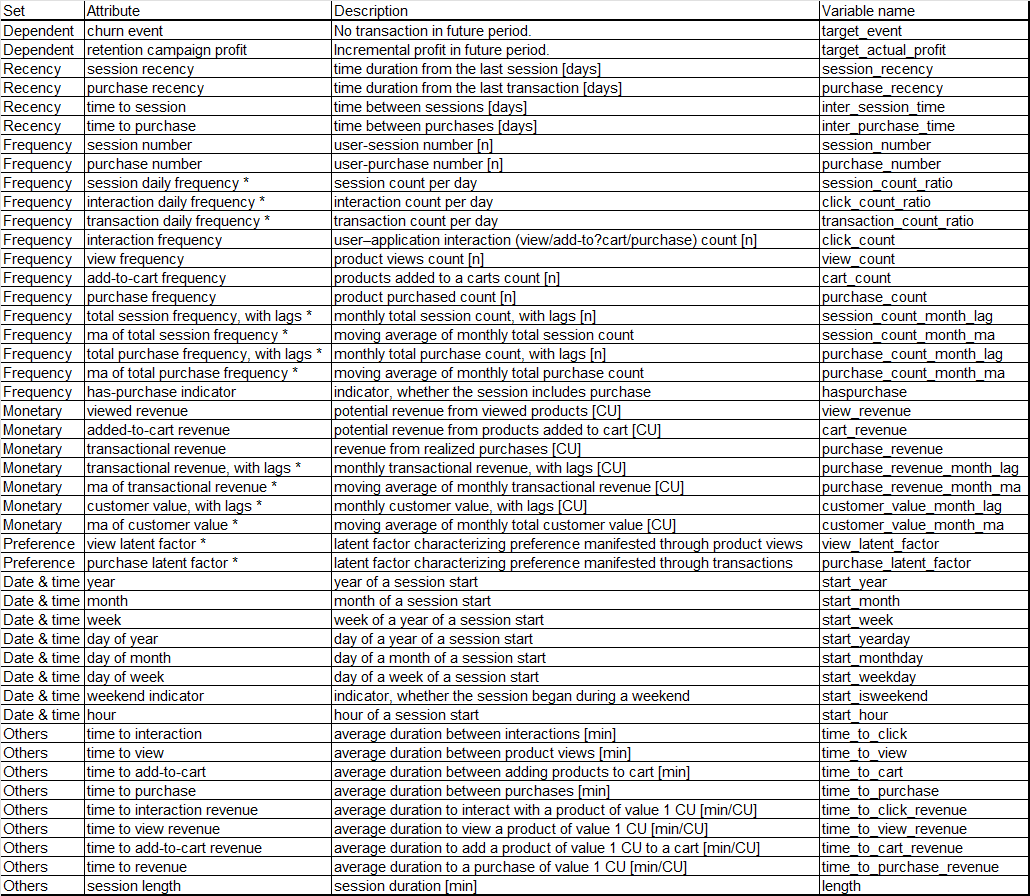

# Data Types

In [14]:
churn.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
row_id,112610.0,5.630550e+04,3.250785e+04,1.000000e+00,2.815325e+04,5.630550e+04,8.445775e+04,1.126100e+05
user_id,112610.0,5.472396e+08,2.879266e+07,4.209864e+08,5.184146e+08,5.460710e+08,5.680586e+08,6.338577e+08
length_mean,112610.0,1.047309e+03,3.963163e+03,0.000000e+00,2.507074e+00,4.098996e+00,8.144096e+00,7.923561e+04
start_year_mean,112610.0,2.019260e+03,3.283764e-01,2.019000e+03,2.019000e+03,2.019083e+03,2.019457e+03,2.020000e+03
start_yearday_mean,112610.0,2.431201e+02,8.928860e+01,1.000000e+00,1.930312e+02,2.816575e+02,3.083650e+02,3.650000e+02
start_month_mean,112610.0,8.502866e+00,2.962692e+00,1.000000e+00,6.826186e+00,1.000000e+01,1.066667e+01,1.200000e+01
start_monthday_mean,112610.0,1.525670e+01,4.117921e+00,1.000000e+00,1.336000e+01,1.562500e+01,1.761883e+01,3.100000e+01
start_week_mean,112610.0,3.454894e+01,1.289114e+01,1.000000e+00,2.676200e+01,4.050000e+01,4.417885e+01,5.200000e+01
start_weekday_mean,112610.0,4.108710e+00,6.729592e-01,1.000000e+00,3.750000e+00,4.080000e+00,4.434782e+00,7.000000e+00
start_isweekend_mean,112610.0,2.855015e-01,1.547334e-01,0.000000e+00,1.947539e-01,2.747253e-01,3.600000e-01,1.000000e+00


In [12]:
churn.dtypes

,0
row_id,int64
user_id,int64
length_mean,float64
start_year_mean,float64
start_yearday_mean,float64
start_month_mean,float64
start_monthday_mean,float64
start_week_mean,float64
start_weekday_mean,float64
start_isweekend_mean,float64


## Free memory by reduction of int's and float's types

In [16]:
# Convert int64 to int32
churn = churn.astype({col: 'int32' for col in churn.select_dtypes(include=['int64']).columns})
# Convert float64 to float32
churn = churn.astype({col: 'float32' for col in churn.select_dtypes(include=['float64']).columns})

In [17]:
print(churn.memory_usage(deep=True).sum())

124321568


# Plot Histograms

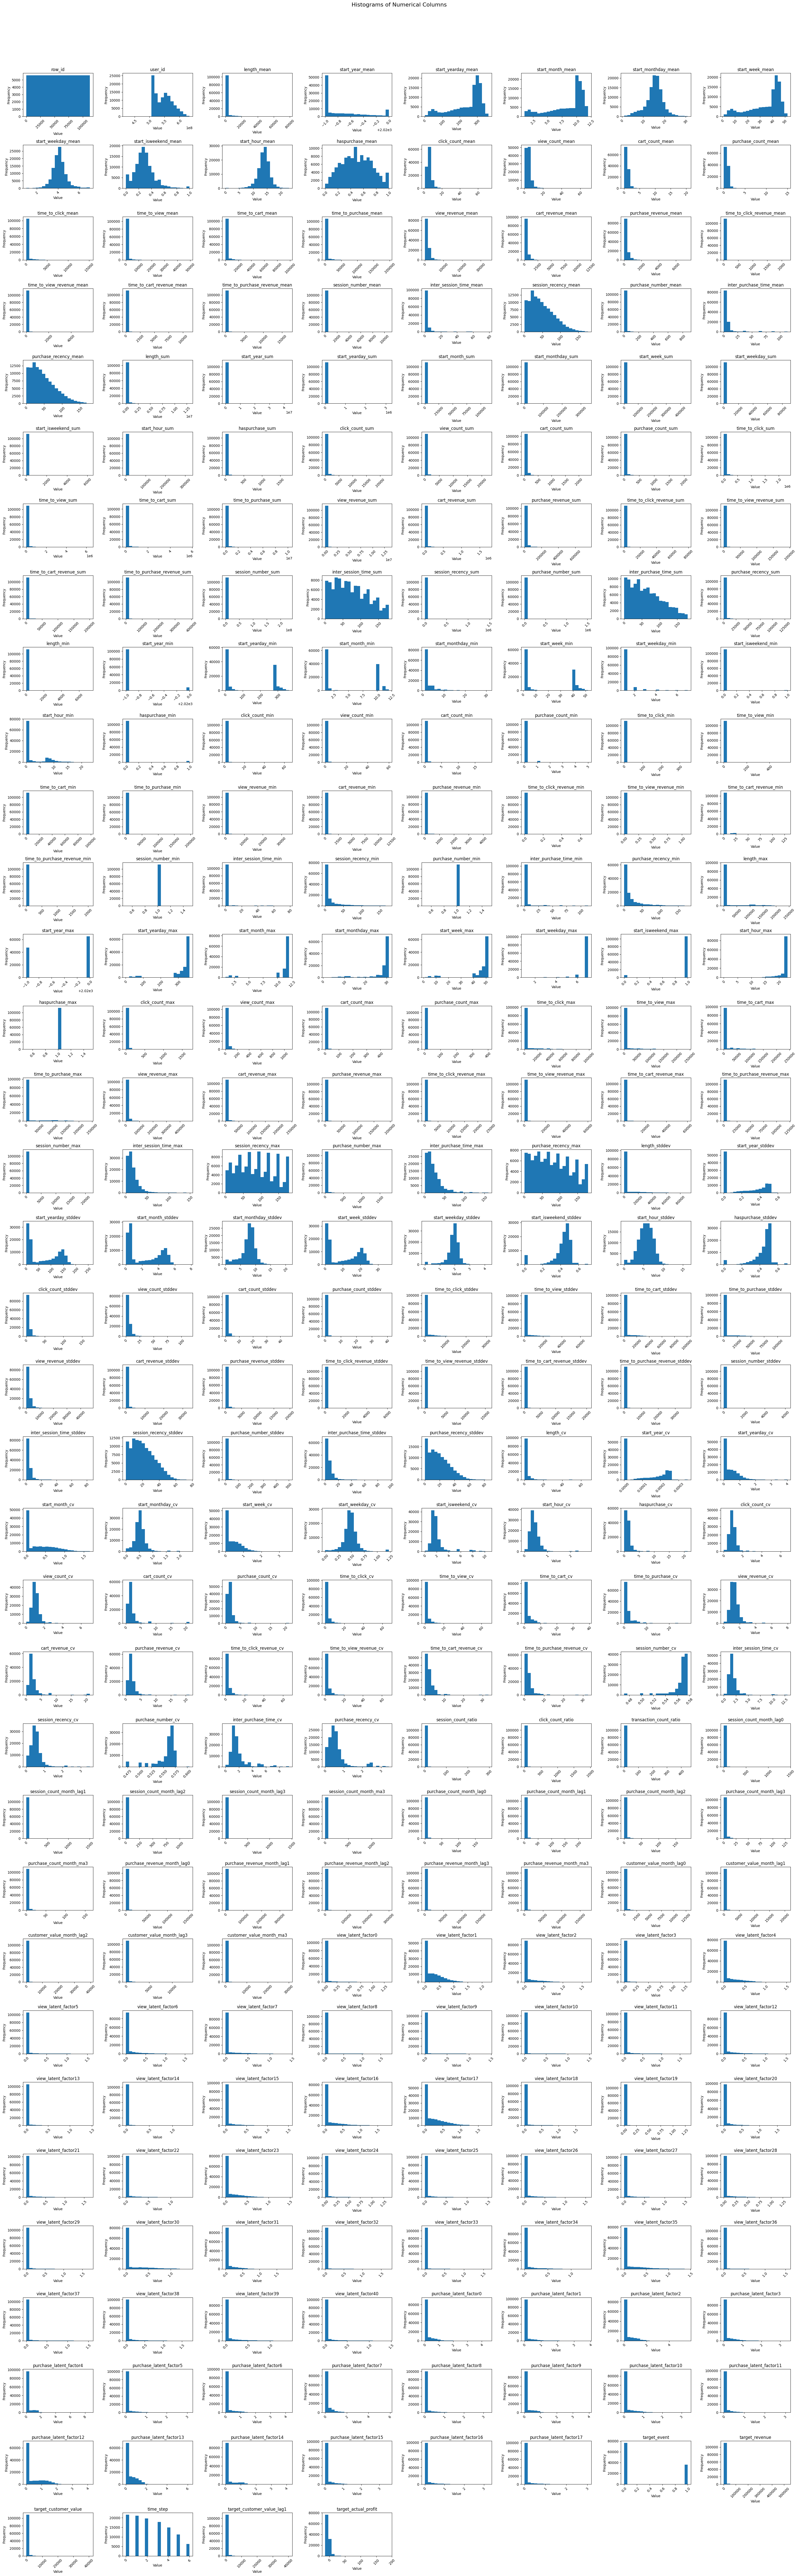

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Set number of columns and dynamic rows for subplots based on 256 variables
n_cols = 8  # Customize as needed (number of columns of subplots)
n_rows = int(np.ceil(len(churn.columns) / n_cols))  # Dynamically calculate rows

# Adjust figure size to accommodate all subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
ax = ax.flatten()  # Flatten the axis array to easily iterate over

# Loop through columns and create histograms
for i, col in enumerate(churn.columns):
    churn[col].hist(ax=ax[i], bins=20, grid=False)  # Plot each histogram
    ax[i].set_title(col)  # Set title as the column name
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Value')

    # Rotate x-axis labels for better readability
    for label in ax[i].get_xticklabels():
        label.set_rotation(45)

# Remove empty subplots if there are any
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Add a super title for the entire figure
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout so the title fits
plt.show()
